In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# hotel_info.csv is a dataset that contains the metadata for all of the hotels in the hotels-50k dataset
# hotel_info.csv contains the columns: hotel_id, hotel_name, chain_id, latitude, longitude
# We are creating a hotel_info dataframe which contains latitude and longitude of the hotels in the dataset 
# to check the geographical distribution of hotels

# Get hotel_info dataset from this link: https://drive.google.com/file/d/1fPVc8jFue9JZ_QGc1Fq8XSAKdnnn2U0b/view?usp=sharing

hotel_info = pd.read_csv("/content/drive/MyDrive/AI Sem 5/AI Project/Datasets/hotel_info.csv", 
                 usecols=["latitude", "longitude"])
hotel_info.head()

,latitude,longitude
0,64.83538,-147.82330
1,29.60819,119.07290
2,19.04391,72.81879
3,46.13663,-60.19551
4,-18.84213,-159.78794


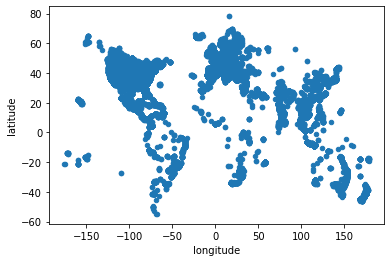

In [ ]:
import matplotlib.pyplot as plt
hotel_info.plot(x="longitude", y="latitude", kind="scatter")

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 15.4 MB 26.2 MB/s 
     |████████████████████████████████| 6.3 MB 41.7 MB/s 


In [ ]:
import geopandas as gpd

countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


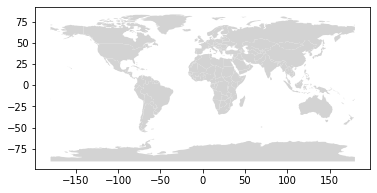

In [ ]:
countries.plot(color="lightgrey")

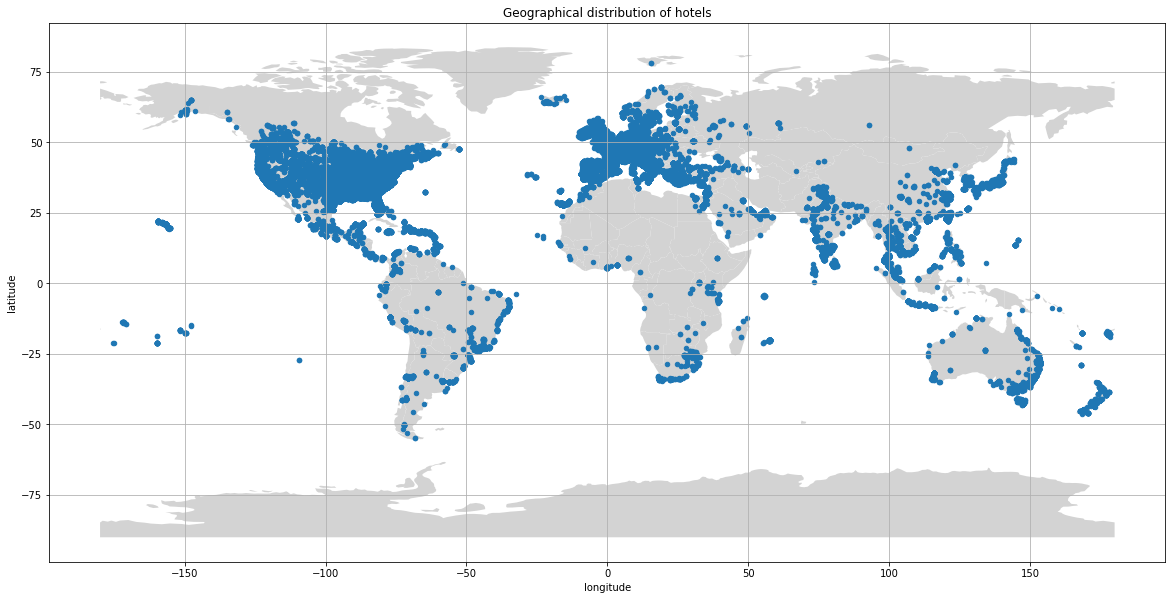

In [ ]:
#Plotting the geographical distribution of hotels on the world map

fig, ax = plt.subplots(figsize=(20,16))

countries.plot(color="lightgrey", ax=ax)
hotel_info.plot(x="longitude", y="latitude", kind="scatter", 
        title=f"Geographical distribution of hotels", 
        ax=ax)

# add grid
ax.grid()
plt.show()

In [ ]:
# Loading the training dataset (containing over 1 million images) for data analysis and visualization
# Get hotels_train dataset from this link: https://drive.google.com/file/d/1VFJn0CGF7CA8dDYxi0LzVJbW84kC56eP/view?usp=sharing

hotels_train = pd.read_csv("/content/drive/MyDrive/AI Sem 5/AI Project/Datasets/train_set.csv", names=["image_id", "hotel_id", "image_url", "image_source", "upload_timestamp"])
hotels_train

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23
...,...,...,...,...,...
1124210,9484584,478252,https://i.travelapi.com/hotels/13000000/129900...,travel_website,2019-12-24 21:10:28
1124211,9484585,478252,https://i.travelapi.com/hotels/13000000/129900...,travel_website,2019-12-24 21:10:28
1124212,9484586,478252,https://i.travelapi.com/hotels/13000000/129900...,travel_website,2019-12-24 21:10:28
1124213,9484587,478252,https://i.travelapi.com/hotels/13000000/129900...,travel_website,2019-12-24 21:10:28


In [ ]:
# Function to convert percentage to numbers
def convert_perc_to_num(val):
    return f'{val / 100 * len(df):.0f}'

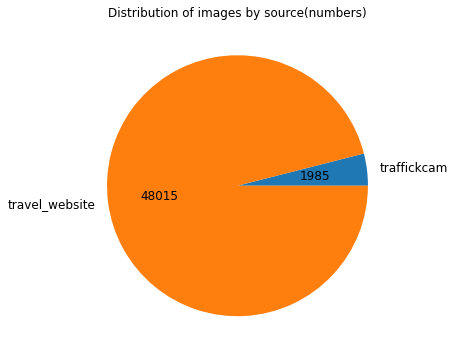

In [ ]:
# Plotting a pie chart to show the distribution of images by source in numbers

plt.subplots(figsize=(7.5, 6))
hotels_train.groupby('image_source').size().plot(kind='pie', textprops={'fontsize': 12}, 
                                       autopct=convert_perc_to_num, 
                                       title='Distribution of images by source(numbers)', 
                                       ylabel = ' ')

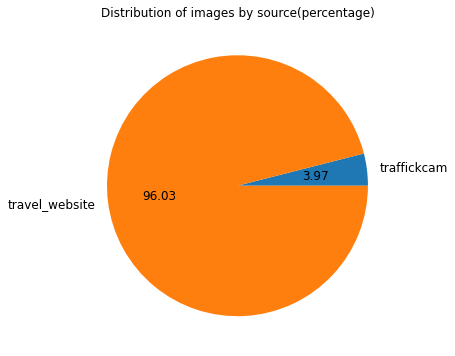

In [ ]:
# Plotting a pie chart to show the distribution of images by source in percentage

plt.subplots(figsize=(7.5, 6))
hotels_train.groupby('image_source').size().plot(kind='pie', textprops={'fontsize': 12}, 
                                       autopct='%.2f',
                                       title='Distribution of images by source(percentage)', 
                                       ylabel = ' ')

In [ ]:
# We are making a copy of the original training dataset so that in the new dataset, we can add the chain_id and the chain_name.

hotels_train_with_chain_info = hotels_train
hotels_train_with_chain_info.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23


In [ ]:
hotel_info = pd.read_csv("/content/drive/MyDrive/AI Sem 5/AI Project/Datasets/hotel_info.csv")
hotel_info.head()

,hotel_id,hotel_name,chain_id,latitude,longitude
0,391,Extended Stay America - Fairbanks - Old Airpor...,72,64.83538,-147.82330
1,392,Hilton Hangzhou Qiandao Lake Resort,3,29.60819,119.07290
2,393,Taj Lands End,-1,19.04391,72.81879
3,395,Cambridge Suites Hotel Sydney,-1,46.13663,-60.19551
4,396,Tamanu Beach,14,-18.84213,-159.78794


In [ ]:
# Get chain_info dataset from this link: https://drive.google.com/file/d/1SYwmoF_KnhL3SPEX7TZDS_DTqsACdmAn/view?usp=sharing

chain_info = pd.read_csv("/content/drive/MyDrive/AI Sem 5/AI Project/Datasets/chain_info.csv")
chain_info.head()

,chain_id,chain_name
0,-1,unknown
1,0,Best Western
2,1,Hyatt
3,2,Marriott
4,3,Hilton


In [ ]:
# We are ading chain_id field from the hotel_info dataset

hotels_train_with_chain_info['chain_id']=hotels_train_with_chain_info[['hotel_id']].merge(hotel_info,how='left').chain_id
hotels_train_with_chain_info.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,chain_id
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,2
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,76
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,-1


In [ ]:
# We are ading chain_name field from the chain_info dataset

hotels_train_with_chain_info['chain_name']=hotels_train_with_chain_info[['chain_id']].merge(chain_info,how='left').chain_name
hotels_train_with_chain_info.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,chain_id,chain_name
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3,Hilton
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3,Hilton
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,2,Marriott
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,76,Sheraton
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,-1,unknown


In [ ]:
# Checking the number of unique hotel chains in the dataset

len(hotels_train_with_chain_info['chain_name'].unique())

93

In [ ]:
# Creating a subset of the dataset with images from only the traffickcam source 

hotels_train_with_chain_info_traffickcam = hotels_train_with_chain_info.loc[hotels_train_with_chain_info['image_source'] == 'traffickcam']
hotels_train_with_chain_info_traffickcam.shape

(44630, 7)

In [ ]:
# Creating a subset of the dataset with images from only the travel website source 

hotels_train_with_chain_info_travelwebsite = hotels_train_with_chain_info.loc[hotels_train_with_chain_info['image_source'] == 'travel_website']
hotels_train_with_chain_info_travelwebsite.shape

(1079585, 7)

In [ ]:
# Creating two dictionaries (one each for traffickcam and travel website) which map hotel_chain with the list of all hotel ids in each hotel_chain

images_per_chain_traffickcam = dict(hotels_train_with_chain_info_traffickcam.groupby('chain_name').groups)
images_per_chain_travelwebsite = dict(hotels_train_with_chain_info_travelwebsite.groupby('chain_name').groups)

In [ ]:
# Mapping the traffickcam dictionary to the number of hotels in each hotel chain by getting the length of the list with hotel ids

for key in images_per_chain_traffickcam.keys():
  images_per_chain_traffickcam[key] = len(images_per_chain_traffickcam[key])

In [ ]:
images_per_chain_traffickcam

{'Adagio': 10,
 'Aloft': 143,
 'Aman': 2,
 'AmericInn': 75,
 'Americas Best Value Inn': 123,
 'Ascend': 88,
 'Baymont Inn & Suites': 96,
 'Best Western': 601,
 'Best Western Plus': 744,
 'Best Western Premier': 23,
 'Cambria Suites': 65,
 'Candlewood Suites': 179,
 'Clarion': 172,
 'Coast': 73,
 'Comfort Inn': 851,
 'Comfort Suites': 561,
 'Conrad': 42,
 'Courtyard by Marriott': 1570,
 'Crowne Plaza': 732,
 'Curio': 10,
 'Days Inn': 560,
 'Delta': 46,
 'DoubleTree': 1726,
 'Econo Lodge': 187,
 'Embassy Suites': 779,
 'Extended Stay America': 195,
 'Fairfield Inn': 978,
 'Fairmont': 104,
 'Four Seasons': 74,
 'Gaylord': 86,
 'Grand Hyatt': 169,
 'GuestHouse': 13,
 'Hampton': 2862,
 'Hilton': 2234,
 'Hilton Garden Inn': 1249,
 'Holiday Inn': 3741,
 'Home2 Suites': 100,
 'Homewood Suites': 460,
 'Howard Johnson': 94,
 'Hyatt': 1609,
 'InterContinental': 177,
 'Kempinski': 6,
 'Kimpton': 203,
 'Knights Inn': 40,
 'La Quinta': 733,
 'Langham': 13,
 'Le Meridien': 64,
 'Loews': 144,
 'Lotte'

In [ ]:
# Mapping the travelwebsite dictionary to the number of hotels in each hotel chain by getting the length of the list with hotel ids

for key in images_per_chain_travelwebsite.keys():
  images_per_chain_travelwebsite[key] = len(images_per_chain_travelwebsite[key])

In [ ]:
images_per_chain_travelwebsite

{'Adagio': 679,
 'Aloft': 852,
 'Aman': 1326,
 'AmericInn': 1064,
 'Americas Best Value Inn': 3659,
 'Ascend': 2020,
 'Baymont Inn & Suites': 1780,
 'Best Western': 21916,
 'Best Western Plus': 12637,
 'Best Western Premier': 1571,
 'Cambria Suites': 395,
 'Candlewood Suites': 3688,
 'Clarion': 3649,
 'Coast': 1461,
 'Comfort Inn': 17922,
 'Comfort Suites': 7881,
 'Conrad': 869,
 'Courtyard by Marriott': 7336,
 'Crowne Plaza': 6775,
 'Curio': 114,
 'Days Inn': 10748,
 'Delta': 781,
 'DoubleTree': 6982,
 'Econo Lodge': 7348,
 'Embassy Suites': 3301,
 'Extended Stay America': 5712,
 'Fairfield Inn': 6347,
 'Fairmont': 1421,
 'Four Points': 15,
 'Four Seasons': 1933,
 'Gaylord': 66,
 'Grand Hyatt': 769,
 'GuestHouse': 2075,
 'Hampton': 25679,
 'Hawthorn Suites': 41,
 'Hilton': 12980,
 'Hilton Garden Inn': 7398,
 'Holiday Inn': 49254,
 'Home2 Suites': 666,
 'Homewood Suites': 4141,
 'Howard Johnson': 2973,
 'Hyatt': 7027,
 'InterContinental': 4330,
 'Kempinski': 1367,
 'Kimpton': 1893,
 'K

In [ ]:
# Checking the length of the dictionary (traffickam)

len(images_per_chain_traffickcam)

90

In [ ]:
# Checking the length of the dictionary (travelwebsite)
len(images_per_chain_travelwebsite)

93

**Observation:** 
The number of hotel chains in the travel website dictionary is more than the number of hotel chains the in traffickcam dictionary. This is because there are some hotel chains which have no images from traffickcam. 

In [ ]:
# Getting a list of all chain names.
chain_names = list(images_per_chain_travelwebsite.keys())

# There is one entry for 'unknown' chains. We will remove that entry.
chain_names.pop()

# Getting a list of the number of travel website images corresponding to each hotel chain.
travel_websites_image_count = list(images_per_chain_travelwebsite.values())

# There is one entry for 'unknown' chains. We will remove that entry.
travel_websites_image_count.pop()

len(chain_names)

92

In [ ]:
# For the chains that do not have any images from traffickcam, we are adding 
# a value of zero corresponding to that chain in the traffickcam dictionary

for chain_name in chain_names:
  if chain_name not in images_per_chain_traffickcam.keys():
    images_per_chain_traffickcam[chain_name] = 0

len(images_per_chain_traffickcam)

93

In [ ]:
traffickcam_image_count = list(images_per_chain_traffickcam.values())

# There is one entry for 'unknown' chains. We will remove that entry.

traffickcam_image_count.pop()

0

Text(0, 0.5, 'Number of Images')

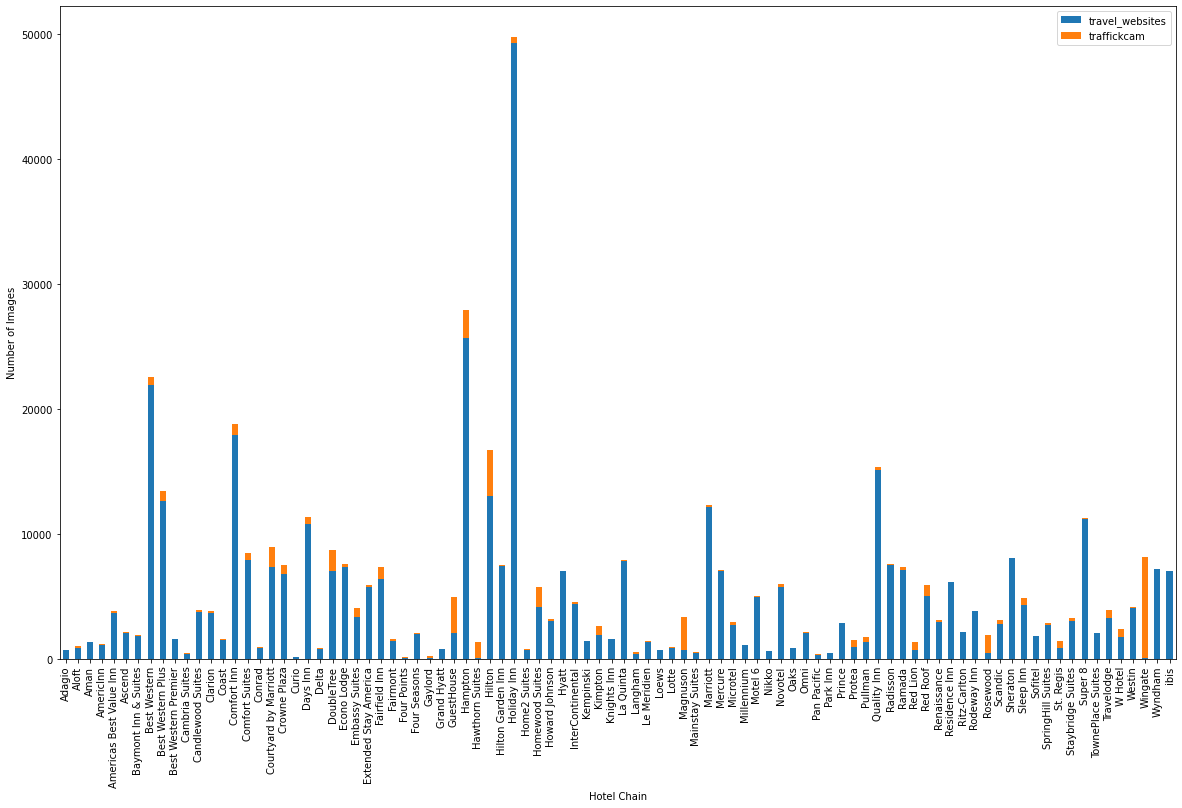

In [ ]:
# Creating a dataframe with two columns (travel_websites and traffickcam) with 
# values equal to the image count per hotel chain from each source

image_count_per_source = pd.DataFrame({'travel_websites': travel_websites_image_count,
                   'traffickcam': traffickcam_image_count,}, 
                    index=chain_names)

# Plotting a bar graph to visualize the number of images per chain from both sources
ax = image_count_per_source.plot.bar(stacked=True, figsize=(20,12))
plt.xlabel("Hotel Chain")
plt.ylabel("Number of Images")

Since our project dataset consists of images, we tried an additional preprocessing step where we used transfer learning to extract features.

In [ ]:
# Storing the dataset into a pandas dataframe
import pandas as pd

# Get hotels dataset from this link: https://drive.google.com/file/d/1gbO9SEAEgcscKSgme6-DU_evBV6OM5yO/view?usp=sharing
hotels = pd.read_csv("hotel_subset.csv")

# Displaying the dataset
hotels.head()

import urllib

# Loads image from a url
def loadImage(URL, image_num):
    with urllib.request.urlopen(URL) as url:
        with open(f'img{image_num}.jpg', 'wb') as f:
            f.write(url.read())

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump

# To supress the warning which is presented on opening the image url as it does not have a security certificate.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

for i in range(0,len(hotels['image_url'])):
    image_url = hotels['image_url'][i]
    loadImage(image_url, i)
    image = load_img(f'img{i}.jpg', target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # load model
    model = VGG16()
    # remove the output layer
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # get extracted features
    features = model.predict(image)
    print(features.shape)
    # save to file
    dump(features, open(f'img{i}.pkl', 'wb'))

image_features = []
for i in range(40):
    image_features.append(f'img{i}.pkl')
hotels['image_features'] = image_features

import pickle
import numpy as np

X1 = []
for i in range(40):
    with open(f'img{i}.pkl', 'rb') as f:
        data = pickle.load(f)
    X1.append(data[0])

X1 = np.asarray(X1)

for i in range(4096):
    feature = []
    for j in range(40):
        feature.append(X1[j][i])
    hotels[f'feature_{i}'] = feature